In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
import seaborn as sns
from scipy import stats
import statsmodels.stats.weightstats as ws
import statsmodels.stats.multicomp as mc 


https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/hypothesis-test-examples?ex=8

In [2]:
cpi_adj_min_wage = 'cpi_adj_min_wage.csv'
min_wage_cpi = pd.read_csv(cpi_adj_min_wage)
min_wage_adj = min_wage_cpi.loc[7:]
min_wage_adj = min_wage_adj.set_index('year')
del min_wage_adj['cpi']


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FED,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,9.798532,7.465548,5.599161,7.465548,7.698847,5.832460,8.632040,7.465548,7.465548,7.465548,...,4.665968,7.465548,6.532355,6.299057,7.465548,7.465548,7.465548,6.765653,5.599161,6.998952
1976-01-01,12.354942,10.148702,8.383710,10.148702,8.824958,5.515599,10.192827,10.148702,8.824958,10.148702,...,8.824958,10.148702,6.177471,7.501215,8.824958,10.148702,10.148702,9.266206,8.824958,7.059967
1977-01-01,11.600701,9.529147,7.871904,9.529147,8.286215,5.178884,9.570578,9.529147,8.286215,9.529147,...,8.286215,9.529147,5.800350,7.043283,8.286215,9.529147,9.529147,8.700526,8.286215,6.628972
1978-01-01,10.778219,8.853537,7.313791,8.853537,7.698728,4.811705,8.892030,8.853537,7.698728,8.853537,...,7.698728,8.853537,5.389109,6.543919,7.698728,8.853537,8.853537,8.083664,7.698728,6.158982
1979-01-01,11.763875,10.033893,7.957915,10.033893,10.033893,6.573930,10.068493,10.033893,6.919927,10.033893,...,7.957915,10.033893,4.843949,8.476910,8.130914,10.033893,7.957915,9.687897,7.611919,5.535941
1980-01-01,10.969578,9.446025,7.770117,9.446025,8.836604,5.789499,9.506967,9.446025,6.094210,9.446025,...,7.008341,9.446025,4.265947,7.922473,7.160696,9.446025,7.008341,9.141315,6.703631,4.875368
1981-01-01,10.632514,9.251668,7.456568,9.251668,9.251668,5.247215,9.306902,9.251668,5.523384,9.251668,...,6.351891,9.251668,3.866369,7.594653,7.318483,9.251668,6.351891,8.975499,7.594653,4.418707
1982-01-01,10.018252,8.717180,7.025787,8.717180,8.717180,4.944072,8.769223,8.717180,5.204287,8.717180,...,5.984930,8.717180,3.643001,7.155894,6.895680,8.717180,5.984930,8.456966,7.155894,4.163429
1983-01-01,9.706439,8.445862,6.807113,8.445862,8.445862,4.790191,8.496285,8.445862,5.042306,8.445862,...,5.798652,8.445862,3.529614,6.933171,6.681055,8.445862,5.798652,8.193747,6.933171,4.033845


In [28]:
min_wage_adj.shape

(44, 52)

In [31]:
housing_file = 'housing_adj_for_cpi.csv'
housing_cpi = pd.read_csv('housing_adj_for_cpi.csv')
y_hous = housing_cpi.index

In [32]:
housing_cpi = housing_cpi.set_index('year')
del housing_cpi['cpi']
housing_cpi.shape

(44, 52)

In [79]:
#ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/ len(x)
    return x, y

all_data_h = []
for state in housing_cpi.columns:
        for element in housing_cpi[state]:
            all_data_h.append(element)
        
all_data_w = []
for state in min_wage_adj.columns:
        for element in min_wage_adj[state]:
            all_data_w.append(element)

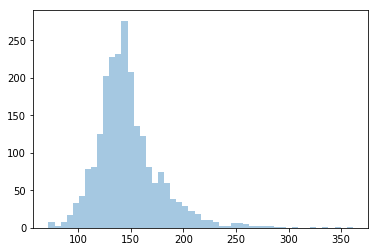

In [80]:
_ = sns.distplot(all_data_h, kde=False)

In [83]:
p = stats.normaltest(all_data_h)
if p.pvalue < .05:
    print('housing data is normally distrubuted, ', p.pvalue)
else:
    print('housing data is not normally distrubuted, ', p.pvalue)


housing data in normally distrubuted,  1.3592078802398962e-153


In [82]:
xh, yh = ecdf(all_data_h)

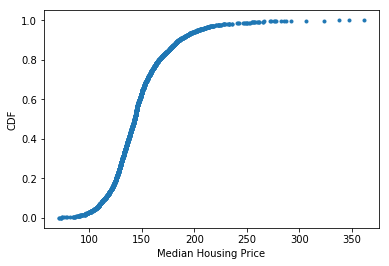

In [92]:
_ = plt.plot(xh, yh, marker=".", linestyle="none")
_ = plt.xlabel('Median Housing Price')
_ = plt.ylabel('CDF')


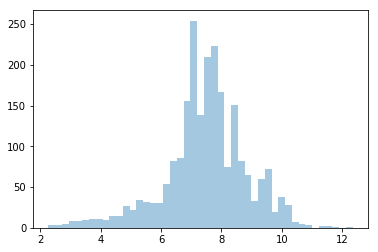

In [85]:
_ = sns.distplot(all_data_w, kde=False)

In [86]:
p = stats.normaltest(all_data_w)
if p.pvalue < .05:
    print('minimum wage data is normally distrubuted, ', p.pvalue)
else:
    print('minimum wage data is not normally distrubuted, ', p.pvalue)

minimum wage data in normally distrubuted,  1.639730873812199e-37


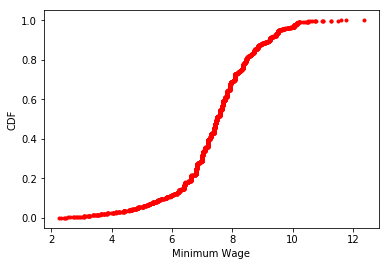

In [93]:
xw, yw = ecdf(all_data_w)

_ = plt.plot(xw, yw, marker=".", linestyle="none", color='red')
_ = plt.xlabel('Minimum Wage')
_ = plt.ylabel('CDF')

In [39]:
years = housing_cpi.index
normal_test = {}
for year in years:
    normal_test[year] = round(stats.normaltest(housing_cpi.loc[year]).pvalue, 5)
    
not_normal_list = []
for year in years:
    if normal_test[year] < .05:
        not_normal_list.append((year,normal_test[year] ))
        
per_not_norm = len(not_normal_list) / len(normal_test)
per_not_norm

0.6363636363636364

In [40]:
# diff of means between states TUKEY TEST

In [41]:
years = housing_cpi.index
min_wage = [] # min wage, housing
housing = []
for year in years:
    for state in housing_cpi.columns.values:
        min_wage.append(min_wage_adj.loc[year][state])
        housing.append(housing_cpi.loc[year][state])



Text(0, 0.5, 'median housing price')

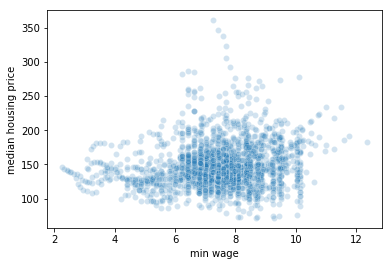

In [42]:
# comparing 
_ = sns.scatterplot(min_wage, housing, alpha=.2)
plt.xlabel('min wage')
plt.ylabel('median housing price')

In [43]:
a = stats.pearsonr(min_wage, housing)
a

(0.14695832549094553, 1.6176871270327868e-12)

I want to see if there is a significant difference in means among the states. I will use a tukey test to determine if the means are significantly different from one another. 

My null hypothesis is there is no difference between mean states median home value.
My alternate hypothesis is there is a difference between the home prices. 

First we will run a one way ANOVA test, to determine if there is a difference. 

In [44]:
housing_cpi.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,FED
year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,174.841590,169.222987,177.664500,137.789917,78.189955,95.691223,119.332126,91.188564,130.919280,156.519890,...,153.969161,158.487373,119.635414,134.302106,135.453045,84.504565,137.684933,214.319566,157.962451,114.242333
1976-01-01,183.397341,169.869416,179.290058,133.345119,85.572679,96.905396,119.309759,96.570783,128.024405,150.307425,...,153.245400,160.213440,124.277475,131.775012,132.458947,89.573326,137.831140,212.674140,166.747587,116.187930
1977-01-01,186.294824,168.838531,183.291071,134.799451,100.560121,102.203554,119.832476,106.305230,125.177084,144.383840,...,155.287117,165.406657,131.350314,132.917790,133.332101,99.717690,147.076860,211.391697,180.394348,122.283814
1978-01-01,189.728727,172.618305,185.869740,145.194796,110.736574,113.007698,126.801252,117.498623,122.669602,149.124355,...,158.933817,176.397097,142.413630,136.697325,138.067057,114.149676,154.898400,217.899655,195.538059,129.717145
1979-01-01,190.966905,170.279208,186.693851,159.181376,116.701677,118.650790,129.832238,125.325636,118.206761,152.699712,...,153.558936,184.219977,145.445322,135.665159,134.148542,119.325483,149.406980,210.097619,206.799121,132.343595


In [95]:
data = []
for state in housing_cpi.columns:
    for year in housing_cpi.index:
        data.append((state, housing_cpi.loc[year][state]))
    
    

#data
        
array = np.rec.array(data, names = ['STATE', 'Price'])



In [46]:
a, p = stats.f_oneway(array[array['STATE'] == 'AK'].Price,
                     array[array['STATE'] == 'AL'].Price,
                     array[array['STATE'] == 'AR'].Price,
                     array[array['STATE'] == 'AZ'].Price,
                     array[array['STATE'] == 'CA'].Price,
                     array[array['STATE'] == 'CO'].Price,
                     array[array['STATE'] == 'CT'].Price,
                     array[array['STATE'] == 'DC'].Price,
                     array[array['STATE'] == 'DE'].Price,
                     array[array['STATE'] == 'FL'].Price,
                     array[array['STATE'] == 'GA'].Price,
                     array[array['STATE'] == 'HI'].Price,
                     array[array['STATE'] == 'ID'].Price,
                     array[array['STATE'] == 'IL'].Price,
                     array[array['STATE'] == 'IN'].Price,
                     array[array['STATE'] == 'IA'].Price,
                     array[array['STATE'] == 'KS'].Price,
                     array[array['STATE'] == 'KY'].Price,
                     array[array['STATE'] == 'LA'].Price,
                     array[array['STATE'] == 'MA'].Price,
                     array[array['STATE'] == 'MD'].Price,
                     array[array['STATE'] == 'ME'].Price,
                     array[array['STATE'] == 'MI'].Price,
                     array[array['STATE'] == 'MN'].Price,
                     array[array['STATE'] == 'MO'].Price,
                     array[array['STATE'] == 'MS'].Price,
                     array[array['STATE'] == 'MT'].Price,
                     array[array['STATE'] == 'NC'].Price,
                     array[array['STATE'] == 'ND'].Price,
                     array[array['STATE'] == 'NE'].Price,
                     array[array['STATE'] == 'NH'].Price,
                     array[array['STATE'] == 'NJ'].Price,
                     array[array['STATE'] == 'NM'].Price,
                     array[array['STATE'] == 'NV'].Price,
                     array[array['STATE'] == 'NY'].Price,
                     array[array['STATE'] == 'OH'].Price,
                     array[array['STATE'] == 'OK'].Price,
                     array[array['STATE'] == 'OR'].Price,
                     array[array['STATE'] == 'PA'].Price,
                     array[array['STATE'] == 'RI'].Price,
                     array[array['STATE'] == 'SC'].Price,
                     array[array['STATE'] == 'SD'].Price,
                     array[array['STATE'] == 'TN'].Price,
                     array[array['STATE'] == 'TX'].Price,
                     array[array['STATE'] == 'UT'].Price,
                     array[array['STATE'] == 'VA'].Price,
                     array[array['STATE'] == 'VT'].Price,
                     array[array['STATE'] == 'WA'].Price,
                     array[array['STATE'] == 'WI'].Price,
                     array[array['STATE'] == 'WV'].Price,
                     array[array['STATE'] == 'WY'].Price,
                     array[array['STATE'] == 'FED'].Price)


In [47]:
p

4.857981301315411e-58

We have an extremely tiny p value, which as expected, indicates that the states have different mean housing prices. 
Lets look for where they are different using the tukey test. 

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [102]:
mc = MultiComparison(array['Price'], array['STATE'])
result = mc.tukeyhsd()
 
result.summary()



5.679756253794173

In [50]:
percent_different = 100 * (np.sum(result.reject) / len(result.reject))
print(percent_different)

16.440422322775262


Using the Tukey test, we can see there are significant differences between some states. 16.44 percent of the states are different from other states means. 

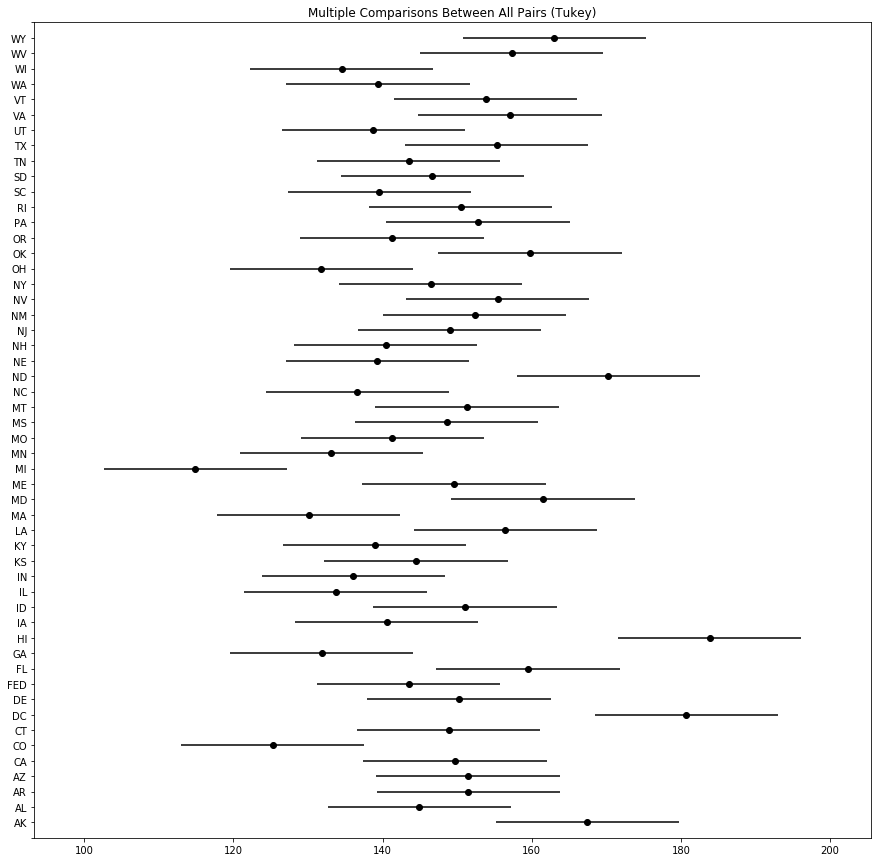

In [96]:
# comparison_name="HI"
ax = result.plot_simultaneous( figsize=(15, 15))


We will apply the same methodology to minimum wage across states. 
Our null hypothesis is that there is no difference between state minimum wage
Our alternate hypothesis is that there is a difference. 


In [52]:
data_min = []
for state in min_wage_adj.columns:
    for year in min_wage_adj.index:
        data_min.append((state, min_wage_adj.loc[year][state]))
    
    

#data
        
array_min = np.rec.array(data_min, names = ['STATE', 'Wage'])


In [53]:
a2, p2 = stats.f_oneway(array_min[array_min['STATE'] == 'AK'].Wage,
                     array_min[array_min['STATE'] == 'AL'].Wage,
                     array_min[array_min['STATE'] == 'AR'].Wage,
                     array_min[array_min['STATE'] == 'AZ'].Wage,
                     array_min[array_min['STATE'] == 'CA'].Wage,
                     array_min[array_min['STATE'] == 'CO'].Wage,
                     array_min[array_min['STATE'] == 'CT'].Wage,
                     array_min[array_min['STATE'] == 'DC'].Wage,
                     array_min[array_min['STATE'] == 'DE'].Wage,
                     array_min[array_min['STATE'] == 'FL'].Wage,
                     array_min[array_min['STATE'] == 'GA'].Wage,
                     array_min[array_min['STATE'] == 'HI'].Wage,
                     array_min[array_min['STATE'] == 'ID'].Wage,
                     array_min[array_min['STATE'] == 'IL'].Wage,
                     array_min[array_min['STATE'] == 'IN'].Wage,
                     array_min[array_min['STATE'] == 'IA'].Wage,
                     array_min[array_min['STATE'] == 'KS'].Wage,
                     array_min[array_min['STATE'] == 'KY'].Wage,
                     array_min[array_min['STATE'] == 'LA'].Wage,
                     array_min[array_min['STATE'] == 'MA'].Wage,
                     array_min[array_min['STATE'] == 'MD'].Wage,
                     array_min[array_min['STATE'] == 'ME'].Wage,
                     array_min[array_min['STATE'] == 'MI'].Wage,
                     array_min[array_min['STATE'] == 'MN'].Wage,
                     array_min[array_min['STATE'] == 'MO'].Wage,
                     array_min[array_min['STATE'] == 'MS'].Wage,
                     array_min[array_min['STATE'] == 'MT'].Wage,
                     array_min[array_min['STATE'] == 'NC'].Wage,
                     array_min[array_min['STATE'] == 'ND'].Wage,
                     array_min[array_min['STATE'] == 'NE'].Wage,
                     array_min[array_min['STATE'] == 'NH'].Wage,
                     array_min[array_min['STATE'] == 'NJ'].Wage,
                     array_min[array_min['STATE'] == 'NM'].Wage,
                     array_min[array_min['STATE'] == 'NV'].Wage,
                     array_min[array_min['STATE'] == 'NY'].Wage,
                     array_min[array_min['STATE'] == 'OH'].Wage,
                     array_min[array_min['STATE'] == 'OK'].Wage,
                     array_min[array_min['STATE'] == 'OR'].Wage,
                     array_min[array_min['STATE'] == 'PA'].Wage,
                     array_min[array_min['STATE'] == 'RI'].Wage,
                     array_min[array_min['STATE'] == 'SC'].Wage,
                     array_min[array_min['STATE'] == 'SD'].Wage,
                     array_min[array_min['STATE'] == 'TN'].Wage,
                     array_min[array_min['STATE'] == 'TX'].Wage,
                     array_min[array_min['STATE'] == 'UT'].Wage,
                     array_min[array_min['STATE'] == 'VA'].Wage,
                     array_min[array_min['STATE'] == 'VT'].Wage,
                     array_min[array_min['STATE'] == 'WA'].Wage,
                     array_min[array_min['STATE'] == 'WI'].Wage,
                     array_min[array_min['STATE'] == 'WV'].Wage,
                     array_min[array_min['STATE'] == 'WY'].Wage,
                     array_min[array_min['STATE'] == 'FED'].Wage)


In [54]:
p2

3.4010282063785677e-205

Since our p-value is so low, we can reject our null hypothesis, that is that the mean minimum wage is the same across states. We will use a Tukey test to determine how different the means are against different states. 

In [55]:
mc2 = MultiComparison(array_min['Wage'], array['STATE'])
result2 = mc2.tukeyhsd()
 
print(result2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  AK     AL   -1.3691  -2.3012 -0.4371  True 
  AK     AR    -1.972  -2.9041  -1.04   True 
  AK     AZ   -1.0609  -1.9929 -0.1288  True 
  AK     CA   -0.6008  -1.5328  0.3313 False 
  AK     CO   -2.4472  -3.3792 -1.5151  True 
  AK     CT    -0.369   -1.301  0.5631 False 
  AK     DC   -1.3691  -2.3012 -0.4371  True 
  AK     DE   -1.7061  -2.6382  -0.774  True 
  AK    FED    -4.414  -5.3461 -3.4819  True 
  AK     FL   -1.3691  -2.3012 -0.4371  True 
  AK     GA   -1.1286  -2.0607 -0.1965  True 
  AK     HI   -3.8336  -4.7657 -2.9015  True 
  AK     IA   -0.8588  -1.7909  0.0733 False 
  AK     ID   -1.2175  -2.1496 -0.2855  True 
  AK     IL   -2.2619   -3.194 -1.3298  True 
  AK     IN   -1.6898  -2.6218 -0.7577  True 
  AK     KS   -2.9279   -3.86  -1.9958  True 
  AK     KY   -3.8994  -4.8315 -2.9673  True 
  AK     LA   -2.3407  -3.272

In [56]:
percent_sig = 100 * (np.sum(result2.reject) / len(result2.reject))
percent_sig

38.68778280542987

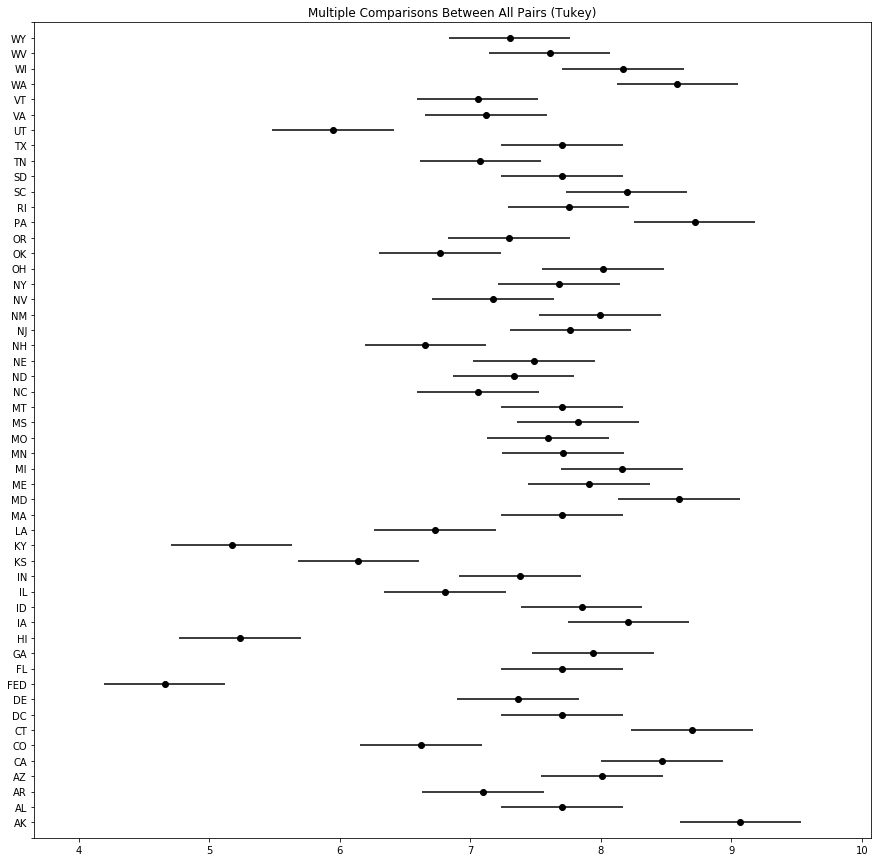

In [106]:
# comparison_name="HI"
ax2 = result2.plot_simultaneous(figsize=(15, 15))

In [107]:
ax2.savefig('wagetukey.png')

In [58]:
fred = Fred(api_key='83dd44fe528f2b9ef86fd007dc7235f7')
mhi = fred.get_series('MEHOINUSA672N')
mhi.head()

1984-01-01    50511.0
1985-01-01    51455.0
1986-01-01    53309.0
1987-01-01    53945.0
1988-01-01    54390.0
dtype: float64

DO RATIO OF THE HOUSING to MINIMUM WAGE
check normality
check significant difference between the two


In [60]:
housing_cpi.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,FED
year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,174.841590,169.222987,177.664500,137.789917,78.189955,95.691223,119.332126,91.188564,130.919280,156.519890,...,153.969161,158.487373,119.635414,134.302106,135.453045,84.504565,137.684933,214.319566,157.962451,114.242333
1976-01-01,183.397341,169.869416,179.290058,133.345119,85.572679,96.905396,119.309759,96.570783,128.024405,150.307425,...,153.245400,160.213440,124.277475,131.775012,132.458947,89.573326,137.831140,212.674140,166.747587,116.187930
1977-01-01,186.294824,168.838531,183.291071,134.799451,100.560121,102.203554,119.832476,106.305230,125.177084,144.383840,...,155.287117,165.406657,131.350314,132.917790,133.332101,99.717690,147.076860,211.391697,180.394348,122.283814
1978-01-01,189.728727,172.618305,185.869740,145.194796,110.736574,113.007698,126.801252,117.498623,122.669602,149.124355,...,158.933817,176.397097,142.413630,136.697325,138.067057,114.149676,154.898400,217.899655,195.538059,129.717145
1979-01-01,190.966905,170.279208,186.693851,159.181376,116.701677,118.650790,129.832238,125.325636,118.206761,152.699712,...,153.558936,184.219977,145.445322,135.665159,134.148542,119.325483,149.406980,210.097619,206.799121,132.343595


In [67]:
min_wage_1975 = min_wage_adj
min_wage_1975.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FED,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,9.798532,7.465548,5.599161,7.465548,7.698847,5.832460,8.632040,7.465548,7.465548,7.465548,...,4.665968,7.465548,6.532355,6.299057,7.465548,7.465548,7.465548,6.765653,5.599161,6.998952
1976-01-01,12.354942,10.148702,8.383710,10.148702,8.824958,5.515599,10.192827,10.148702,8.824958,10.148702,...,8.824958,10.148702,6.177471,7.501215,8.824958,10.148702,10.148702,9.266206,8.824958,7.059967
1977-01-01,11.600701,9.529147,7.871904,9.529147,8.286215,5.178884,9.570578,9.529147,8.286215,9.529147,...,8.286215,9.529147,5.800350,7.043283,8.286215,9.529147,9.529147,8.700526,8.286215,6.628972
1978-01-01,10.778219,8.853537,7.313791,8.853537,7.698728,4.811705,8.892030,8.853537,7.698728,8.853537,...,7.698728,8.853537,5.389109,6.543919,7.698728,8.853537,8.853537,8.083664,7.698728,6.158982
1979-01-01,11.763875,10.033893,7.957915,10.033893,10.033893,6.573930,10.068493,10.033893,6.919927,10.033893,...,7.957915,10.033893,4.843949,8.476910,8.130914,10.033893,7.957915,9.687897,7.611919,5.535941


In [77]:
ratio_df = housing_cpi / min_wage_1975
ratio_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FED,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,17.843651,22.667187,31.730556,18.456771,10.156061,16.406667,13.824324,12.214583,17.536458,15.302604,...,35.811667,20.623958,24.261905,18.992593,17.989583,18.143750,11.319271,20.350575,38.277083,22.569444
1976-01-01,14.844048,16.738043,21.385526,13.139130,9.696667,17.569333,11.705267,9.515580,14.507083,11.448551,...,18.513333,15.100000,25.935119,16.567647,14.932083,13.051812,8.826087,14.874603,24.099167,23.618750
1977-01-01,16.058929,17.718116,23.284211,14.146014,12.135833,19.734667,12.520924,11.155797,15.106667,12.832609,...,20.132500,16.296014,28.516667,18.649020,16.040833,13.992029,10.464493,16.904365,25.511250,27.213021
1978-01-01,17.602976,19.497101,25.413596,16.399638,14.383750,23.486000,14.260101,13.271377,15.933750,14.651449,...,22.570833,17.951449,32.732143,21.762745,17.755833,15.594565,12.893116,19.161905,28.303333,31.748437
1979-01-01,16.233333,16.970402,23.460145,15.864368,11.630747,18.048684,12.894903,12.490230,17.082083,13.189655,...,20.306522,15.304023,38.030952,17.157823,16.685106,13.369540,14.994565,15.422024,27.601136,37.355729


In [76]:
ratio_list = []
for state in ratio_df.columns:
    if(state != 'year'):
        for element in ratio_df[state]:
            ratio_list.append(element)
        
norm_ratio = stats.normaltest(ratio_list)
print(norm_ratio)
if norm_ratio.pvalue < .05:
    print('yip')

NormaltestResult(statistic=1044.608725288366, pvalue=1.4658766588822264e-227)
yip


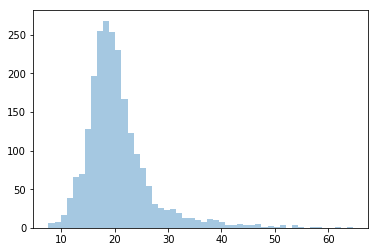

In [75]:
ratio_ = sns.distplot(ratio_list, kde=False)